In [74]:
import numpy as np 
import pandas as pd 

In [75]:
df = pd.read_csv("datasets/telco-churn.csv")

### understanding the data 


In [76]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [78]:
#No null data 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Cleaning the data


In [80]:
# Remove leading/trailing spaces and convert to NaN where conversion fails
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

#check how many Nans we have now 
print(df['TotalCharges'].isnull().sum())

#Drop rows with NaN in TotalCharges (only a few rows)
df.dropna(subset=['TotalCharges'], inplace=True)

11


In [81]:
#drop irrelevant collumn
df.drop('customerID', axis=1, inplace=True)


In [82]:
#convert target variable to numeric data -- Yes to 1 and NO to 0 
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})




In [83]:
#We’ll use pd.get_dummies to one-hot encode them (Random Forest handles this well).
df = pd.get_dummies(df, drop_first=True)


### EDA 

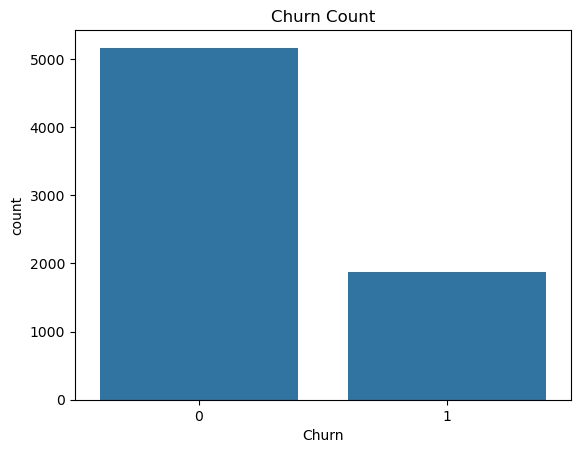

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


In [84]:
#check chrun distribution 
import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(x='Churn',data=df)
plt.title("Churn Count")
plt.show()
print(df['Churn'].value_counts(normalize=True))


#### visualize key features vs Churn 

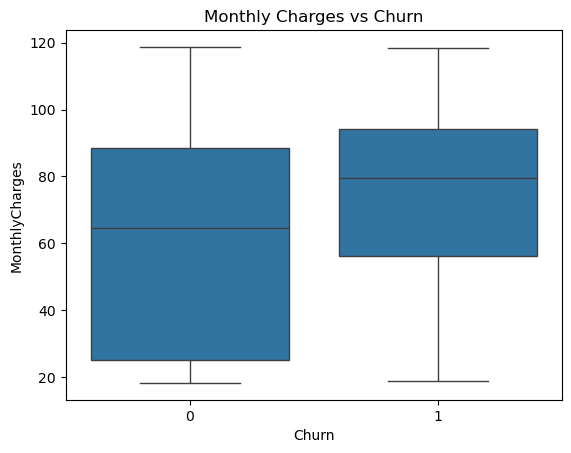

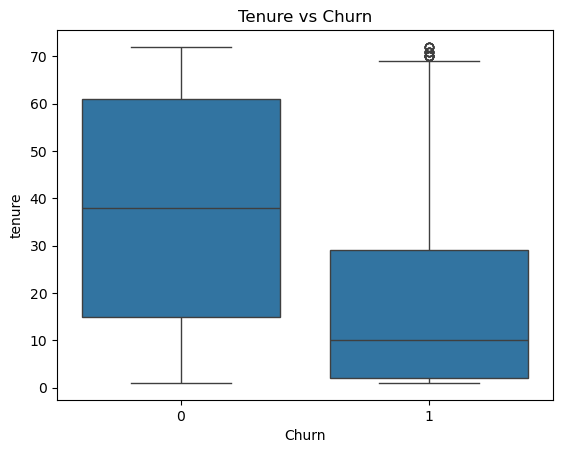

In [85]:
# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


In [86]:
# Contract Type vs Churn
contract_churn = df.groupby('Contract_Two year')['Churn'].mean()
print("Churn rate by 2-year contract:", contract_churn)


Churn rate by 2-year contract: Contract_Two year
False    0.340565
True     0.028487
Name: Churn, dtype: float64


#### Correalation Heatmap

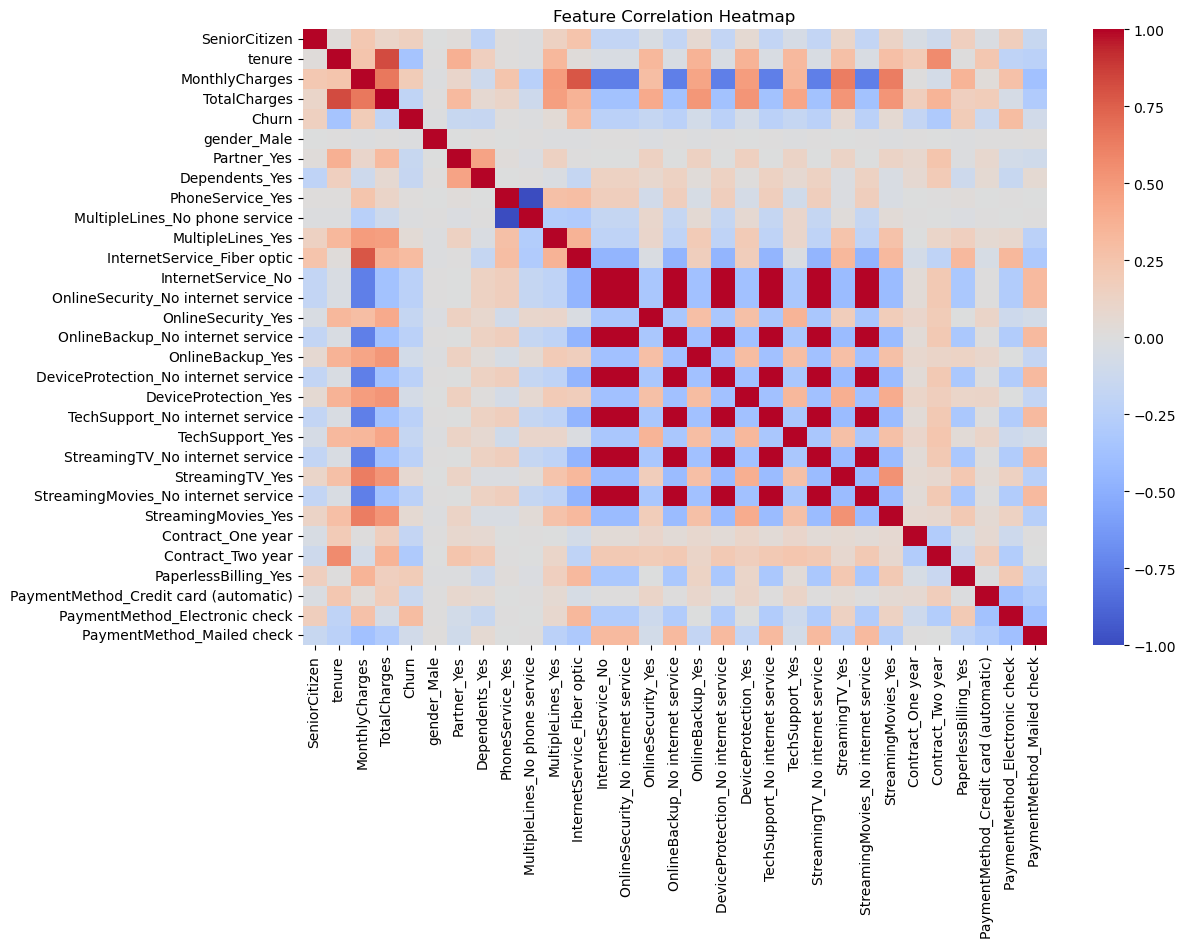

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


### Train Test Split 

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Model Training

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
RFC = RandomForestClassifier(n_estimators=100,random_state=42)

In [93]:
RFC

RandomForestClassifier(random_state=42)

In [94]:
RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation  

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test data
y_pred = RFC.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7853589196872779

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


Confusion Matrix:
 [[927 106]
 [196 178]]
